In [1]:
from urllib.request import urlretrieve
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

savepath = "winequality-white.csv"
urlretrieve(url, savepath)


('winequality-white.csv', <http.client.HTTPMessage at 0x107c43550>)

In [2]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000,6
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000,6


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# read data
wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

y = wine["quality"]
x = wine.drop("quality", axis=1)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# learning
model = RandomForestClassifier()
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率= ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.91      0.37      0.53        27
           5       0.67      0.70      0.69       293
           6       0.65      0.74      0.69       446
           7       0.59      0.49      0.54       175
           8       0.80      0.38      0.51        32
           9       0.00      0.00      0.00         3

   micro avg       0.65      0.65      0.65       980
   macro avg       0.52      0.38      0.42       980
weighted avg       0.65      0.65      0.65       980

正解率=  0.6540816326530612


/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


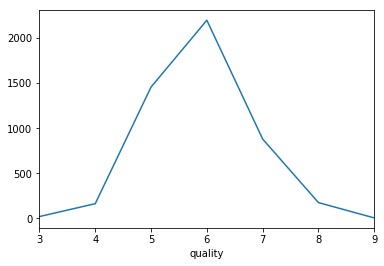

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# counting
count_data = wine.groupby('quality')["quality"].count()
print(count_data)

# show graph
count_data.plot()
plt.savefig("wine-count-plt.png")
plt.show()

In [10]:
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

wine = pd.read_csv("winequality-white.csv", sep=";", encoding="utf-8")

# split label and data
y = wine["quality"]
x = wine.drop("quality", axis=1)

# re-label
newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
y = newlist

# split learning data and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# learning

model = RandomForestClassifier()
model.fit(x_train, y_train)

# evaluate
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))
print("正解率= ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.33      0.45        36
           1       0.95      0.99      0.97       906
           2       1.00      0.39      0.57        38

   micro avg       0.95      0.95      0.95       980
   macro avg       0.89      0.57      0.66       980
weighted avg       0.94      0.95      0.94       980

正解率=  0.9469387755102041


/usr/local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
